Photometry for GJ674

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import astropy.io.fits as fits
import os
from scipy.io.idl import readsav
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u


%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

Using code from my vot_to_phot.py script

In [5]:
phottab = 'GJ674_5as_vizier_votable.vot'

In [6]:
from astropy.io.votable import parse

In [7]:
votable = parse(phottab)
table = votable.get_first_table()
data = table.array

In [8]:
c = 2.998e8

In [9]:
mask = ~data['sed_eflux'].mask
masked_data = data[mask].data
filters = np.unique(masked_data['sed_filter'].data)
w = []
f = []
e = []
for filter in filters:
    w1 = 10.*c/np.mean(masked_data['sed_freq'][masked_data['sed_filter']==filter])
    fj1 = masked_data['sed_flux'][masked_data['sed_filter']==filter]
    e1 = masked_data['sed_eflux'][masked_data['sed_filter']==filter]
    if len(fj1) >1:
        fj_av = np.average(fj1, weights = (1/(e1**2)))
        e1_av = abs(np.average((fj1-fj_av), weights = (1/(e1**2))))**0.5
    else:
        fj_av, e1_av = fj1[0], e1[0]
    f1 = 2.99792458E-05*fj_av/(w1**2)
    w.append(w1)
    f.append(f1)
    e.append((e1_av*f1)/fj_av)

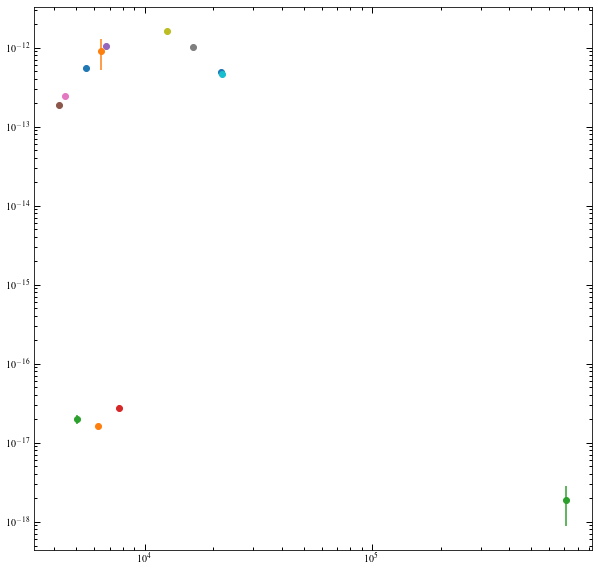

In [10]:
plt.figure('sed', figsize=(10,10))
for i in range(len(w)):
    if e[i] !=0.0:
        plt.errorbar(w[i], f[i], yerr=e[i], marker='o', ls='none', label = filters[i])
    #else:
     #   plt.errorbar(w[i], f[i], yerr=f[i]*0.1, marker='o', ls='none', uplims=True,label = filters[i])
plt.yscale('log')
plt.xscale('log')
#plt.legend()

In this case I don't want to average the repeats as the star is variable.

In [11]:
filters

array([b'2MASS:H', b'2MASS:J', b'2MASS:Ks', b'GAIA/GAIA2:G',
       b'GAIA/GAIA2:Gbp', b'GAIA/GAIA2:Grp', b'Gaia:G', b'HIP:BT',
       b'HIP:VT', b'Johnson:B', b'Johnson:H', b'Johnson:J', b'Johnson:K',
       b'Johnson:V', b'POSS-II:F', b'Spitzer/MIPS:70'], dtype='|S32')

In [12]:
mw = fits.getdata('../PHOENIX/WAVE_PHOENIX-ACES-AGSS-COND-2011.fits',0)
mf = fits.getdata('../PHOENIX/lte03400-4.50-0.0.PHOENIX-ACES-AGSS-COND-2011-HiRes.fits')

(1e-16, 1e-11)

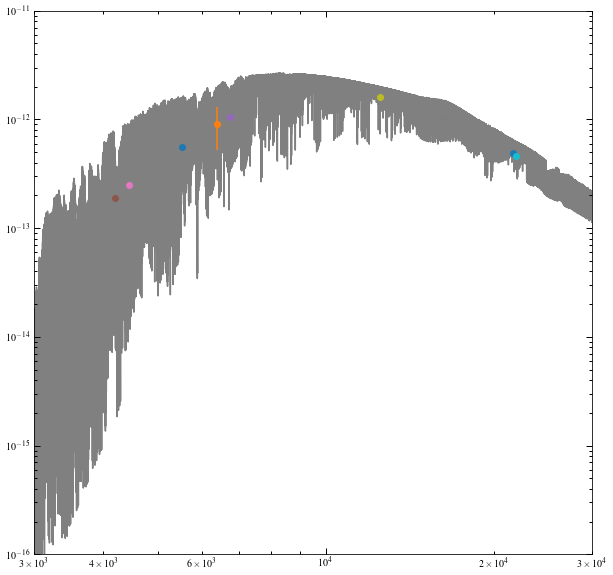

In [13]:
plt.figure('sed', figsize=(10,10))
for i in range(len(w)):
    if e[i] !=0.0:
        plt.errorbar(w[i], f[i], yerr=e[i], marker='o', ls='none', label = filters[i])
plt.yscale('log')
plt.xscale('log')
plt.plot(mw, mf*4e-26, zorder=-100, c='0.5')
plt.xlim(3000, 30000)
plt.ylim(1e-16, 1e-11)

In [75]:

print(filters)

[b'2MASS:H' b'2MASS:J' b'2MASS:Ks' b'GAIA/GAIA2:G' b'GAIA/GAIA2:Gbp'
 b'GAIA/GAIA2:Grp' b'Gaia:G' b'HIP:BT' b'HIP:VT' b'Johnson:B' b'Johnson:H'
 b'Johnson:J' b'Johnson:K' b'Johnson:V' b'POSS-II:F' b'Spitzer/MIPS:70']


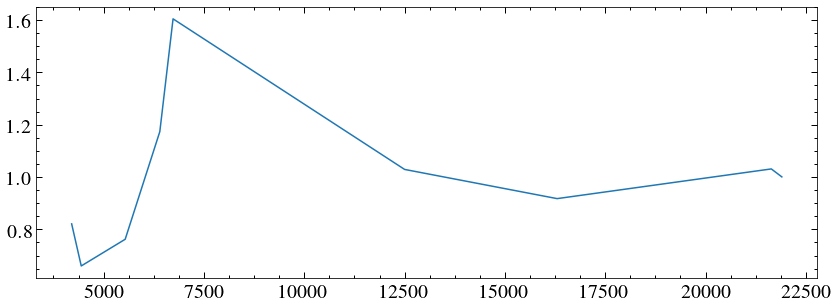

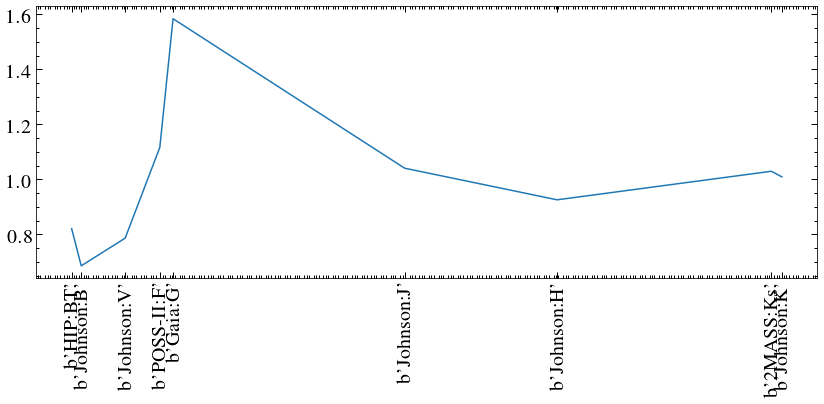

In [83]:
scales_mean = []
scales_median = []
w_abs = []
flt = []
for i in range(len(w)):
    if e[i] >0.0 and w[i] < mw[-1] and b'GAIA/GAIA2' not in filters[i]:
        wi = w[i]
        m_slice= (mw > wi-10.) & (mw <wi+10.)
        f_slice = mf[m_slice]
        scales_mean.append(f[i]/np.mean(f_slice))
        scales_median.append(f[i]/np.median(f_slice))
        w_abs.append(wi)
        flt.append(filters[i])
    
w_abs = np.array(w_abs) 
flt = np.array(flt)
#w_abs = np.array(w)[(np.array(e)>0.0)&(w<mw[-1])]
#flt = filters[(np.array(e)>0.0)&(w<mw[-1])]
arr1inds = w_abs.argsort()
w_abs = w_abs[arr1inds]
scales_mean = np.array(scales_mean)[arr1inds]
scales_median = np.array(scales_median)[arr1inds]
flt = flt[arr1inds]

#print(w_abs)
#plt.plot(w_abs, scales_mean/scales_median)
#plt.axhline(1, c='r')
#plt.show()
#scales = scales_median*1e26
plt.plot(w_abs, scales_median/np.mean(scales_median))
#plt.xticks(w_abs, flt, rotation = 'vertical')
plt.show()

plt.plot(w_abs, scales_mean/np.mean(scales_mean))
plt.xticks(w_abs, flt, rotation = 'vertical')
plt.show()


(1e-16, 1e-11)

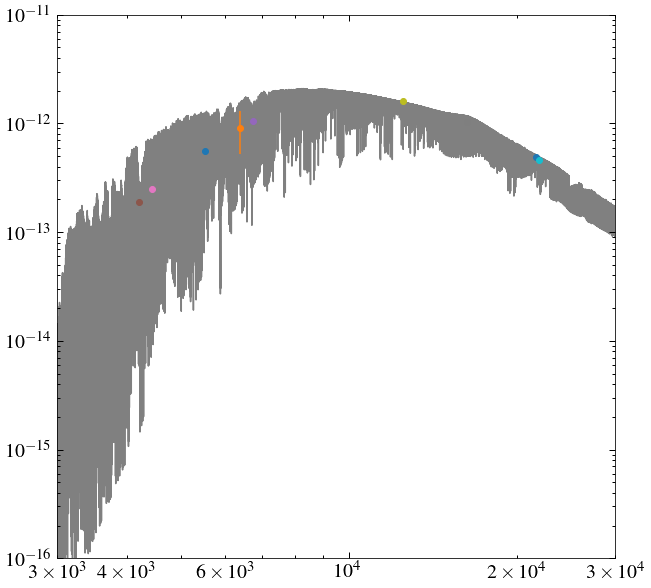

In [86]:
plt.figure('sed', figsize=(10,10))
for i in range(len(w)):
    if e[i] !=0.0:
        plt.errorbar(w[i], f[i], yerr=e[i], marker='o', ls='none', label = filters[i])
plt.yscale('log')
plt.xscale('log')
plt.plot(mw, mf*np.mean(scales_median), zorder=-100, c='0.5')
plt.xlim(3000, 30000)
plt.ylim(1e-16, 1e-11)

Trying with bandpasses.

In [87]:
flt

array([b'HIP:BT', b'Johnson:B', b'Johnson:V', b'POSS-II:F', b'Gaia:G',
       b'Johnson:J', b'Johnson:H', b'2MASS:Ks', b'Johnson:K'],
      dtype='|S12')

In [135]:
bandnames = ['bessel_j', 'bessel_h', 'bessel_k',
            'cousins_r', 'cousins_i', 'johnson_u', 'johnson_b', 'johnson_v',
            'johnson_r', 'johnson_i', 'johnson_j', 'johnson_k']
bandpasses = [b'Bessel:J', b'Bessel:H', b'Bessel:K',
            b'Cousins:R', b'Cousins:I', b'Johnson:U', b'Johnson:B', b'Johnson:V',
            b'Johnson:R', b'Johnson:I', b'Johnson:J', b'Johnson:K']

In [136]:
[print(ft) for ft in flt if ft in bandpasses]
[print(bandnames[bandpasses.index(ft)]) for ft in flt if ft in bandpasses]


b'Johnson:B'
b'Johnson:J'
b'Johnson:K'
b'Johnson:V'
johnson_b
johnson_j
johnson_k
johnson_v


[None, None, None, None]

In [137]:
from synphot import SpectralElement
from scipy import interpolate

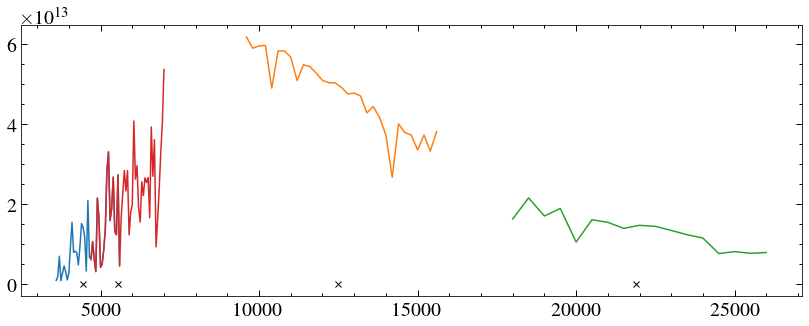

(1e-16, 1e-11)

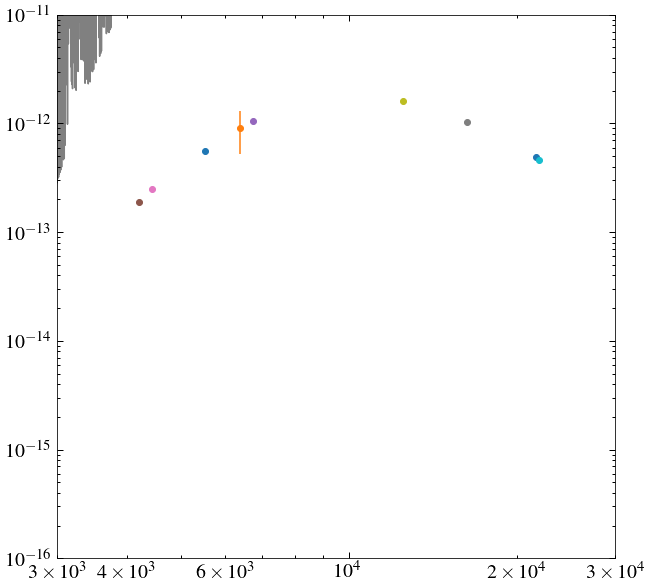

In [150]:
scales = []
w_abs = []
flt = []
for i in range(len(w)):
    if e[i] >0.0 and w[i] < mw[-1] and filters[i] in bandpasses:
        w_abs.append(w[i])
        flt.append(filters[i])
        bp = SpectralElement.from_filter(bandnames[bandpasses.index(filters[i])])
        #print(bp.waveset[1].value)
        mask = (mw > bp.waveset[0].value) & (mw < bp.waveset[-1].value)
        bmw, bmf = mw[mask], mf[mask]
        mfi = interpolate.interp1d(bmw, bmf, fill_value='extrapolate')
        bw  = bp.waveset.value
        bandflux = mfi(bw)
        intflux = np.trapz(bandflux*(bp(bp.waveset)/np.mean(bp.waveset)), bw)
        plt.plot(bw, bandflux)
        plt.plot(w[i], intflux/(bw[-1]-bw[0]), 'kx')
        scale = f[i]/(intflux/(bw[-1]-bw[0])).value
        scales.append(scale)
plt.show()
        
    
        

w_abs = np.array(w_abs) 
#flt = np.array(flt)
#w_abs = np.array(w)[(np.array(e)>0.0)&(w<mw[-1])]
#flt = filters[(np.array(e)>0.0)&(w<mw[-1])]
arr1inds = w_abs.argsort()
w_abs = w_abs[arr1inds]
scales = np.array(scales)[arr1inds]
#flt = flt[arr1inds]

plt.figure('sed', figsize=(10,10))
for i in range(len(w)):
    if e[i] !=0.0:
        plt.errorbar(w[i], f[i], yerr=e[i], marker='o', ls='none', label = filters[i])
plt.yscale('log')
plt.xscale('log')
plt.plot(mw, mf*np.mean(scales), zorder=-100, c='0.5')
plt.xlim(3000, 30000)
plt.ylim(1e-16, 1e-11)

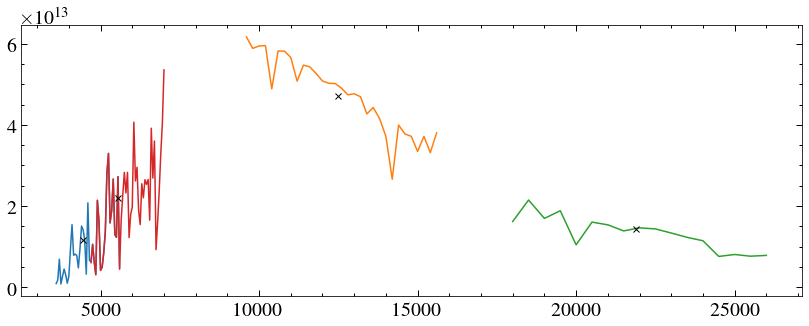

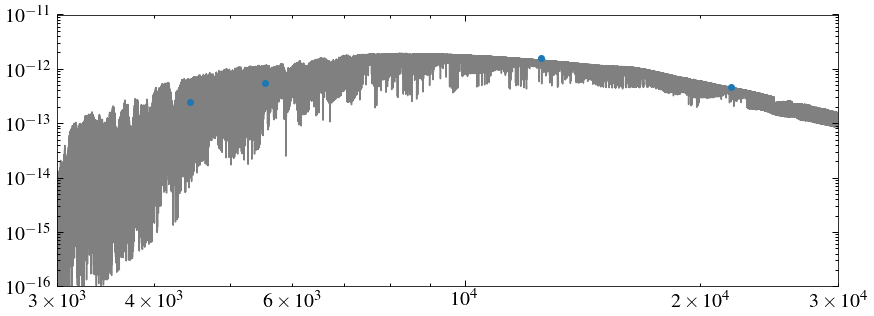

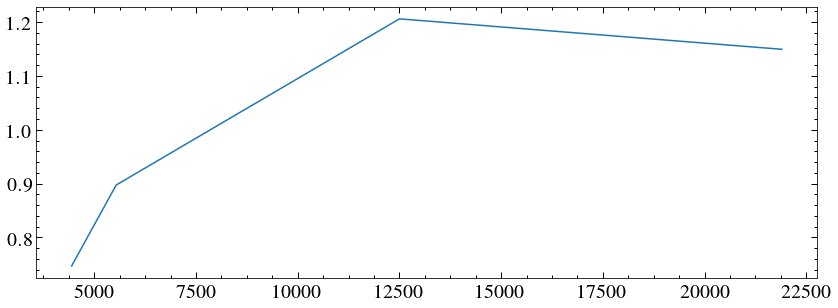

In [158]:
scales = []
w_abs = []
flt = []
f_abs = []
e_abs = []
for i in range(len(w)):
    if e[i] >0.0 and w[i] < mw[-1] and filters[i] in bandpasses:
        w_abs.append(w[i])
        flt.append(filters[i])
        f_abs.append(f[i])
        e_abs.append(e[i])
        bp = SpectralElement.from_filter(bandnames[bandpasses.index(filters[i])])
        #print(bp.waveset[1].value)
        mask = (mw > bp.waveset[0].value) & (mw < bp.waveset[-1].value)
        bmw, bmf = mw[mask], mf[mask]
        mfi = interpolate.interp1d(bmw, bmf, fill_value='extrapolate')
        bw  = bp.waveset.value
        bandflux = mfi(bw)
        #intflux = np.trapz(bandflux*(bp(bp.waveset)/np.mean(bp.waveset)), bw)
        intflux = np.trapz(bmf, bmw)
        plt.plot(bw, bandflux)
        plt.plot(w[i], intflux/(bmw[-1]-bmw[0]), 'kx')
        scale = f[i]/(intflux/(bmw[-1]-bmw[0]))
        scales.append(scale)
plt.show()
        
    
        

w_abs = np.array(w_abs) 
#flt = np.array(flt)
#w_abs = np.array(w)[(np.array(e)>0.0)&(w<mw[-1])]
#flt = filters[(np.array(e)>0.0)&(w<mw[-1])]
arr1inds = w_abs.argsort()
w_abs = w_abs[arr1inds]
scales = np.array(scales)[arr1inds]
f_abs = np.array(f_abs)[arr1inds]
e_abs = np.array(e_abs)[arr1inds]
#flt = flt[arr1inds]

plt.figure('sed')
plt.errorbar(w_abs, f_abs, yerr=e_abs, marker='o', ls='none', label = filters[i])
plt.yscale('log')
plt.xscale('log')
plt.plot(mw, mf*np.median(scales), zorder=-100, c='0.5')
plt.xlim(3000, 30000)
plt.ylim(1e-16, 1e-11)
plt.show()
plt.plot(w_abs, scales/np.mean(scales))
plt.show()

So all I really need is the waveband of each fliter, not the sensitivity curve- much easier to tabulate!

In [162]:
[print(ft) for ft in filters]

b'2MASS:H'
b'2MASS:J'
b'2MASS:Ks'
b'GAIA/GAIA2:G'
b'GAIA/GAIA2:Gbp'
b'GAIA/GAIA2:Grp'
b'Gaia:G'
b'HIP:BT'
b'HIP:VT'
b'Johnson:B'
b'Johnson:H'
b'Johnson:J'
b'Johnson:K'
b'Johnson:V'
b'POSS-II:F'
b'Spitzer/MIPS:70'


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [164]:
for b, n in zip(bandnames,bandpasses):
    b = SpectralElement.from_filter(b)
    print(n, b.waveset[0].value, b.waveset[-1].value)

b'Bessel:J' 10400.0 14400.0
b'Bessel:H' 14600.0 18400.0
b'Bessel:K' 19400.0 24800.0
b'Cousins:R' 5500.0 8700.0
b'Cousins:I' 7000.0 8900.0
b'Johnson:U' 3050.0 4150.0
b'Johnson:B' 3600.0 5600.0
b'Johnson:V' 4700.0 7000.0
b'Johnson:R' 5200.0 9600.0
b'Johnson:I' 6800.0 12000.0
b'Johnson:J' 9600.0 15600.0
b'Johnson:K' 18000.0 26000.0


In [165]:
bw = Table.read('../../../vizer_bandwidths.csv')

In [166]:
bw

bandname,l_start,l_end
str12,int64,int64
b'2MASS:H',12890,19140
b'2MASS:J',10620,14500
b'2MASS:Ks',19000,23990
b'Gaia:G',3200,10500
b'Bessel:J',10400,14400
b'Bessel:H',14600,18400
b'Bessel:K',19400,24800
b'Cousins:R',5500,8700
b'Cousins:I',7000,8900


In [179]:
[print(ft) for ft in filters if str(ft) in bw['bandname']]
#bw['bandname'][0]

b'2MASS:H'
b'2MASS:J'
b'2MASS:Ks'
b'Gaia:G'
b'Johnson:B'
b'Johnson:J'
b'Johnson:K'
b'Johnson:V'


[None, None, None, None, None, None, None, None]

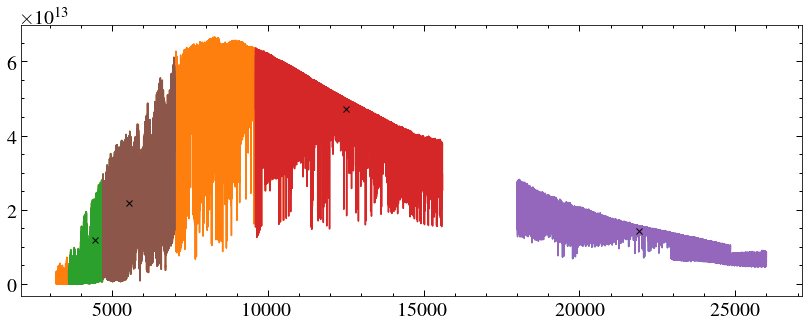

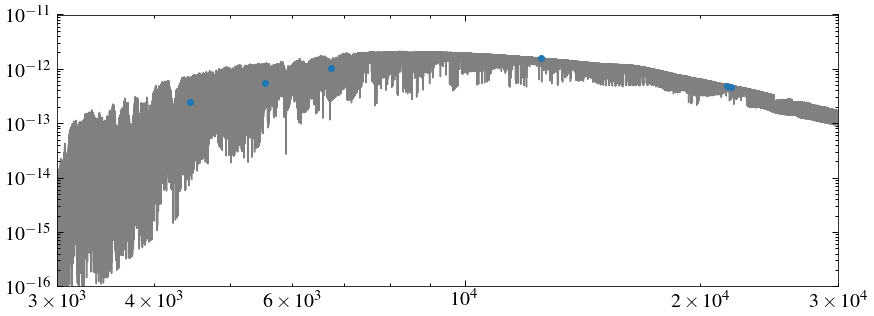

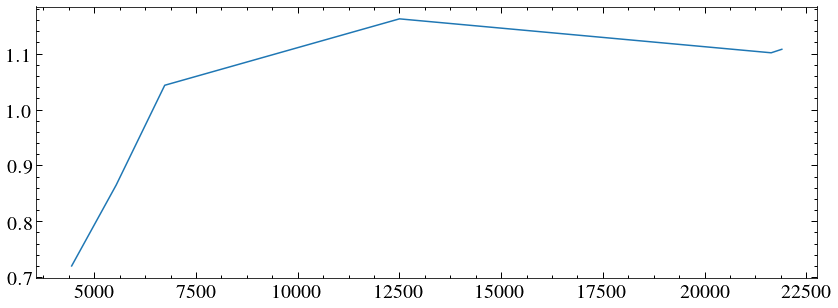

In [183]:
scales = []
w_abs = []
flt = []
f_abs = []
e_abs = []
for i in range(len(w)):
    if e[i] >0.0 and w[i] < mw[-1] and str(filters[i]) in bw['bandname']:
        w_abs.append(w[i])
        flt.append(filters[i])
        f_abs.append(f[i])
        e_abs.append(e[i])
        bp = bw[bw['bandname']==str(filters[i])]
        #print(bp.waveset[1].value)
        mask = (mw > bp['l_start']) & (mw < bp['l_end'])
        bmw, bmf = mw[mask], mf[mask]
        
        #intflux = np.trapz(bandflux*(bp(bp.waveset)/np.mean(bp.waveset)), bw)
        intflux = np.trapz(bmf, bmw)
        plt.plot(bmw, bmf)
        plt.plot(w[i], intflux/(bp['l_end']-bp['l_start']), 'kx')
        scale = f[i]/(intflux/(bp['l_end']-bp['l_start']))
        scales.append(scale)
plt.show()
        
    
        

w_abs = np.array(w_abs) 
#flt = np.array(flt)
#w_abs = np.array(w)[(np.array(e)>0.0)&(w<mw[-1])]
#flt = filters[(np.array(e)>0.0)&(w<mw[-1])]
arr1inds = w_abs.argsort()
w_abs = w_abs[arr1inds]
scales = np.array(scales)[arr1inds]
f_abs = np.array(f_abs)[arr1inds]
e_abs = np.array(e_abs)[arr1inds]
#flt = flt[arr1inds]

plt.figure('sed')
plt.errorbar(w_abs, f_abs, yerr=e_abs, marker='o', ls='none', label = filters[i])
plt.yscale('log')
plt.xscale('log')
plt.plot(mw, mf*np.median(scales), zorder=-100, c='0.5')
plt.xlim(3000, 30000)
plt.ylim(1e-16, 1e-11)
plt.show()

plt.plot(w_abs, scales/np.mean(scales))
plt.show()

This is still using averaged values for each filter, maybe better to use non-averaged data.

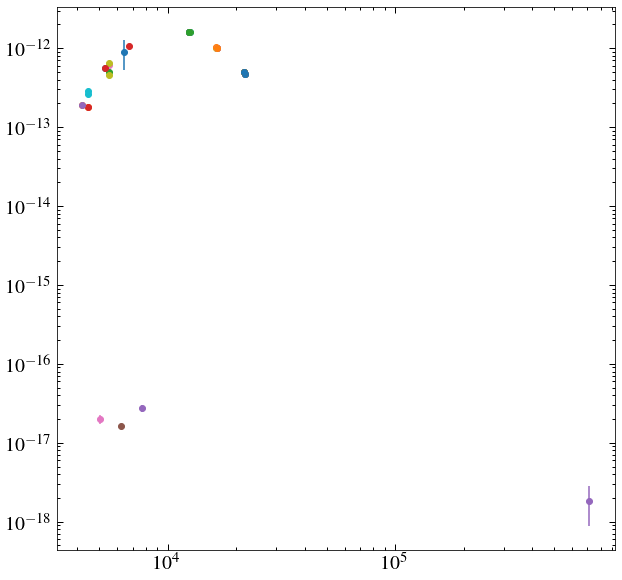

In [198]:
mask = ~data['sed_eflux'].mask
masked_data = data[mask].data
#filters = masked_data['sed_filter'].data
w = []
f = []
e = []
filters = []
for i in range(len(masked_data['sed_freq'])):
    w.append(10.*c/masked_data['sed_freq'][i])
    f.append(2.99792458E-05*masked_data['sed_flux'][i]/(w[i]**2))
    e.append((masked_data['sed_eflux'][i]*f[i])/masked_data['sed_flux'][i])
    filters.append(masked_data['sed_filter'][i])
#print(w,f,e)

plt.figure('sed', figsize=(10,10))
for i in range(len(w)):
    if e[i] !=0.0:
        plt.errorbar(w[i], f[i], yerr=e[i], marker='o', ls='none')
    else:
        plt.errorbar(w[i], f[i], yerr=f[i]*0.1, marker='o', ls='none', uplims=True)
plt.yscale('log')
plt.xscale('log')
                                     
#for filter in filters:
 #   w1 = 10.*c/np.mean(masked_data['sed_freq'][masked_data['sed_filter']==filter])
 #   fj1 = masked_data['sed_flux'][masked_data['sed_filter']==filter]
 #   e1 = masked_data['sed_eflux'][masked_data['sed_filter']==filter]
 #   if len(fj1) >1:
 #       fj_av = np.average(fj1, weights = (1/(e1**2)))
  ##      e1_av = abs(np.average((fj1-fj_av), weights = (1/(e1**2))))**0.5
   # else:
   #     fj_av, e1_av = fj1[0], e1[0]
   # f1 = 2.99792458E-05*fj_av/(w1**2)
   # w.append(w1)
   # f.append(f1)
   # e.append((e1_av*f1)/fj_av)

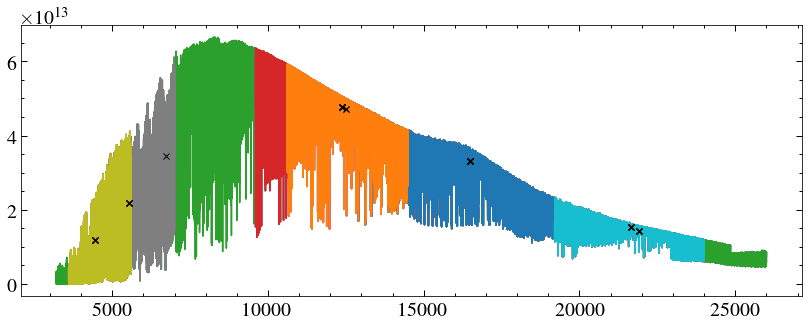

[1.17406973e+13 1.17406973e+13 1.17406973e+13 1.17406973e+13
 2.19126424e+13 2.19126424e+13 2.19126424e+13 2.19126424e+13
 3.44621631e+13 4.77256558e+13 4.77256558e+13 4.77256558e+13
 4.77256558e+13 4.77256558e+13 4.77256558e+13 4.71935743e+13
 4.71935743e+13 3.31775543e+13 3.31775543e+13 3.31775543e+13
 3.31775543e+13 3.31775543e+13 3.31775543e+13 1.53125214e+13
 1.53125214e+13 1.53125214e+13 1.53125214e+13 1.53125214e+13
 1.43526008e+13 1.43526008e+13 1.43526008e+13 1.43526008e+13]


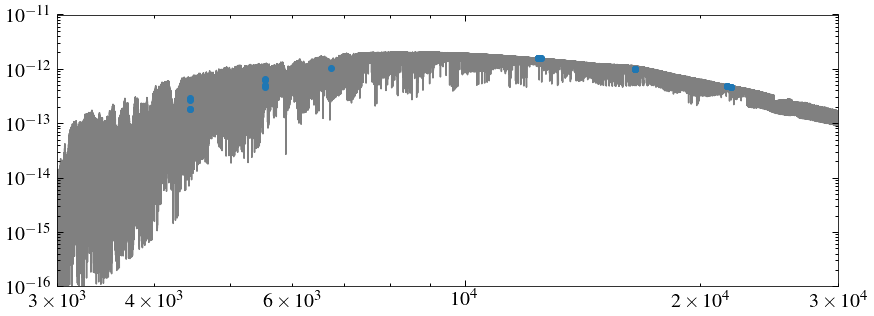

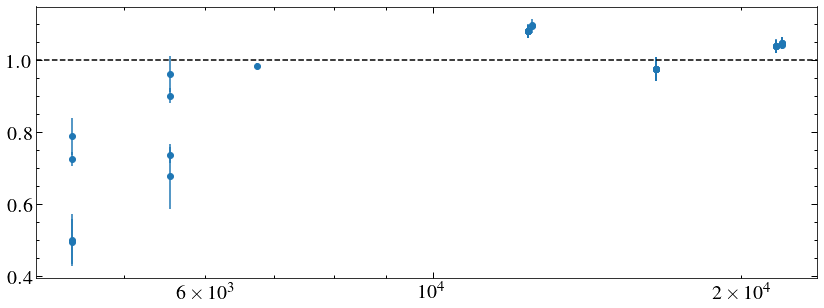

In [245]:
scales = []
w_abs = []
flt = []
f_abs = []
e_abs = []
m_phot = []
for i in range(len(w)):
    if e[i] >0.0 and w[i] < mw[-1] and str(filters[i]) in bw['bandname']:
        w_abs.append(w[i])
        flt.append(filters[i])
        f_abs.append(f[i])
        e_abs.append(e[i])
        bp = bw[bw['bandname']==str(filters[i])]
        #print(bp.waveset[1].value)
        mask = (mw > bp['l_start']) & (mw < bp['l_end'])
        bmw, bmf = mw[mask], mf[mask]
        #intflux = np.trapz(bandflux*(bp(bp.waveset)/np.mean(bp.waveset)), bw)
        intflux = np.trapz(bmf, bmw)
        plt.plot(bmw, bmf, zorder=-100)
        plt.plot(w[i], intflux/(bp['l_end']-bp['l_start']), 'kx')
        bandwidth = (bp['l_end']-bp['l_start'])
        #print(bandwidth)
        mp = intflux/bandwidth
       # print(mp[0])
        m_phot.append(mp[0])
        scale = f[i]/(intflux/(bp['l_end']-bp['l_start']))
        scales.append(scale)
plt.show()
        
    
        

w_abs = np.array(w_abs) 
arr1inds = w_abs.argsort()
w_abs = w_abs[arr1inds]
scales = np.array(scales)[arr1inds]
f_abs = np.array(f_abs)[arr1inds]
e_abs = np.array(e_abs)[arr1inds]
m_phot = np.array(m_phot)[arr1inds]
                      
e_scale = e_abs*scale/f_abs
#print(e_scale)
#print(scales
mean_scale = np.average(scales, axis =0, weights = 1/e_scale)
print(m_phot)

plt.figure('sed')
plt.errorbar(w_abs, f_abs, yerr=e_abs, marker='o', ls='none', label = filters[i])
plt.yscale('log')
plt.xscale('log')
plt.plot(mw, mf*mean_scale, zorder=-100, c='0.5')
plt.xlim(3000, 30000)
plt.ylim(1e-16, 1e-11)
plt.show()


plt.errorbar(w_abs, scales/mean_scale, yerr = e_scale/mean_scale, marker='o', ls ='none')
plt.xscale('log')
plt.axhline(1.0, c='k', ls ='--')
plt.show()

In [219]:
print(mean_scale)

[3.10619669e-26]


So this is the value that needs to go into the combined spectrum. Let's put the scaled model into an ascci file, make it easier to work with.

In [220]:
data = Table([mw*u.AA, (mf*mean_scale)], names = ['WAVELENGTH', 'FLUX'] )
ascii.write(data, 'scaled_03400-4.50-0.0_phoenix_gj674.ecsv', delimiter=',', format='ecsv')

In [221]:
dt = Table.read('scaled_03400-4.50-0.0_phoenix_gj674.ecsv')

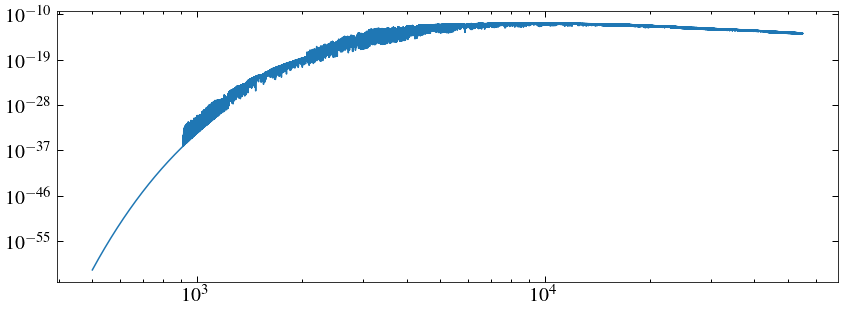

In [223]:
plt.plot(dt['WAVELENGTH'], dt['FLUX'])
plt.yscale('log')
plt.xscale('log')

Good. Next I'll stick it to the HST data in "combined". Should experiment with finding the scaling factor via a mean chi-square instead.

In [224]:
from scipy.optimize import leastsq

def residuals(scale, f, mf):
    return f - mf/scale


In [250]:
#print(f_abs, m_phot)
scale, flag = leastsq(residuals, 1., args=(f_abs, m_phot))
print(1/scale)

[3.19143165e-26]


Good, very similar to mean_scale. I'll put that into the combined spectrum. Need to look at weights...

In [251]:
data = Table([mw*u.AA, (mf/scale)], names = ['WAVELENGTH', 'FLUX'] )
ascii.write(data, 'scaled_03400-4.50-0.0_phoenix_gj674.ecsv', delimiter=',', format='ecsv')

(1e-16, 1e-11)

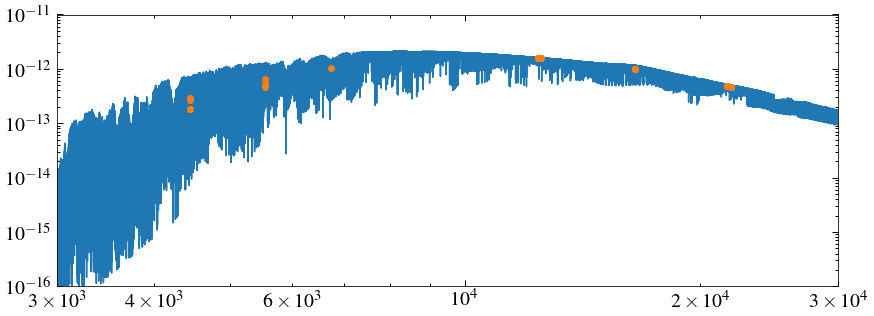

In [253]:
dt = Table.read('scaled_03400-4.50-0.0_phoenix_gj674.ecsv')
plt.plot(dt['WAVELENGTH'], dt['FLUX'])
plt.yscale('log')
plt.xscale('log')
plt.errorbar(w_abs, f_abs, yerr=e_abs, marker='o', ls='none')
plt.xlim(3000, 30000)
plt.ylim(1e-16, 1e-11)